# Supervised case study: Flight dataset

# Problem Statement :
The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. Apply EDA, statistical methods and Machine learning algorithms in order to get meaningful information from it. 

# Dataset Information:
Flight booking price prediction dataset contains around 3 lacs records with 11 attributes - airline,flight,source_city,	departure_time,stops,arrival_time,destination_city,class,duration,days_left,price .

# Importing the required libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/home/vanchhit/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


# Loading the dataset:

In [2]:
flight = pd.read_csv("/home/vanchhit/Downloads/Clean_Dataset.csv")

In [3]:
flight

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# EDA:

In [4]:
#dropping the unnamed column as it is giving the index values only
flight=flight.drop('Unnamed: 0',axis=1)

In [5]:
flight.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
flight.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
39212,AirAsia,I5-829,Delhi,Night,one,Morning,Chennai,Economy,11.58,27,3918
257180,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Hyderabad,Business,15.92,21,56588
121193,Air_India,AI-747,Kolkata,Night,one,Night,Delhi,Economy,21.33,12,14364
150647,Air_India,AI-770,Kolkata,Night,one,Afternoon,Chennai,Economy,16.17,29,6229
209998,Air_India,AI-485,Delhi,Early_Morning,one,Evening,Mumbai,Business,10.92,32,39622
160063,Indigo,6E-199,Hyderabad,Early_Morning,zero,Early_Morning,Mumbai,Economy,1.50,14,4453
10003,GO_FIRST,G8-143,Delhi,Morning,one,Night,Bangalore,Economy,13.08,1,7424
255469,Vistara,UK-854,Bangalore,Evening,one,Evening,Kolkata,Business,22.42,42,51817
117891,Vistara,UK-816,Bangalore,Morning,one,Night,Chennai,Economy,11.58,29,9734
249425,Vistara,UK-812,Bangalore,Morning,one,Evening,Mumbai,Business,6.75,11,54684


In [7]:
flight.columns #columns of the dataset

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [8]:
flight.shape #shape of the dataset

(300153, 11)

In [9]:
flight.info() #info of the dataset:null values and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [10]:
df = flight # renaming the dataset for easiness

In [11]:
df.describe() #summary of the numerical columns

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


ANALYSIS : 
1. There is almost zero difference in the mean and median of duration and days_left columns so there are no outliers and the data is normally distributed.
2. There is large diff between mean and median of price column (mean>median) so there are outliers. Also mean -median is positive therefore it is right sckewed distribution.

In [12]:
df.describe(include='all') #summary of all the columns

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [13]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [14]:
df.airline.value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [15]:
df.destination_city.value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [16]:
df.source_city.nunique()

6

In [17]:
df.source_city.unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [18]:
#checking the null/missing values:
df.isnull().sum()    #there are no null/missing values in the dataset

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [19]:
#checking the duplicate values and adding them 
df.duplicated().sum()  #there are no duplicate values in the dataset

0

# DATA VISUALIZATION:

<AxesSubplot:xlabel='airline', ylabel='price'>

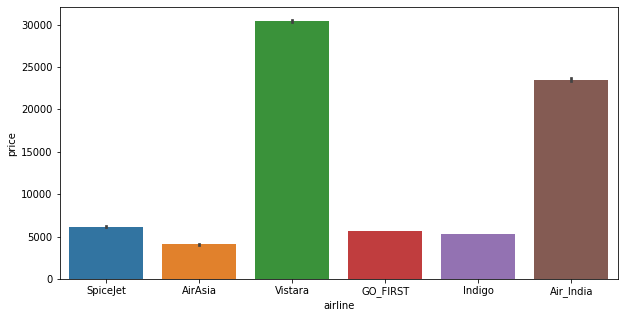

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['airline'],y=df['price'])

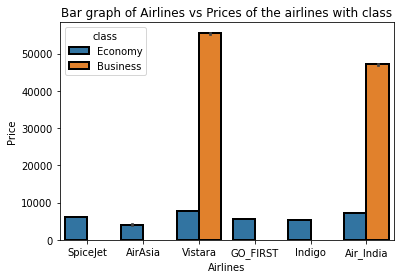

<Figure size 720x720 with 0 Axes>

In [21]:
x= df['airline']
y=df['price']
sns.barplot(x=x,y=y,hue=df['class'],edgecolor='black',linewidth=2)
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.title('Bar graph of Airlines vs Prices of the airlines with class')
plt.figure(figsize=(10,10))
plt.show()

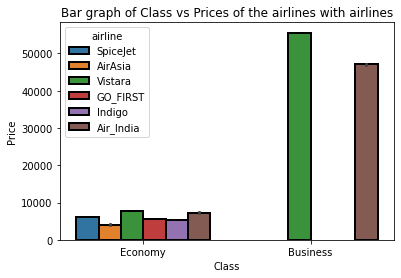

<Figure size 720x720 with 0 Axes>

In [22]:
x= df['class']
y=df['price']
sns.barplot(x=x,y=y,hue=df['airline'],edgecolor='black',linewidth=2)
plt.xlabel('Class')
plt.ylabel('Price')
plt.title('Bar graph of Class vs Prices of the airlines with airlines')
plt.figure(figsize=(10,10))
plt.show()

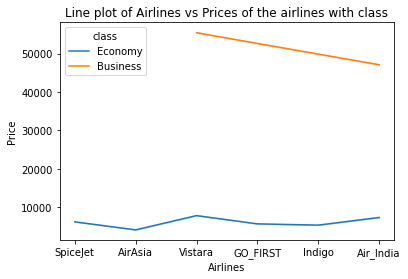

<Figure size 1080x720 with 0 Axes>

In [23]:
x= df['airline']
y=df['price']
sns.lineplot(x=x,y=y,hue=df['class'])
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.title('Line plot of Airlines vs Prices of the airlines with class')
plt.figure(figsize=(15,10))
plt.show()

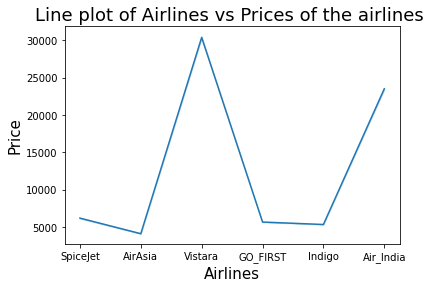

<Figure size 1080x360 with 0 Axes>

In [24]:
x= df['airline']
y=df['price']
sns.lineplot(x=x,y=y)
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('Line plot of Airlines vs Prices of the airlines ',fontsize=18)
plt.figure(figsize=(15,5))
plt.show()

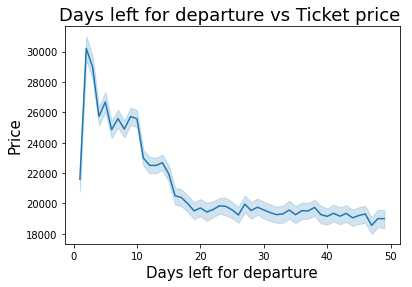

<Figure size 1080x360 with 0 Axes>

In [25]:
x= df['days_left']
y=df['price']
sns.lineplot(x=x,y=y)
plt.xlabel('Days left for departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('Days left for departure vs Ticket price ',fontsize=18)
plt.figure(figsize=(15,5))
plt.show()

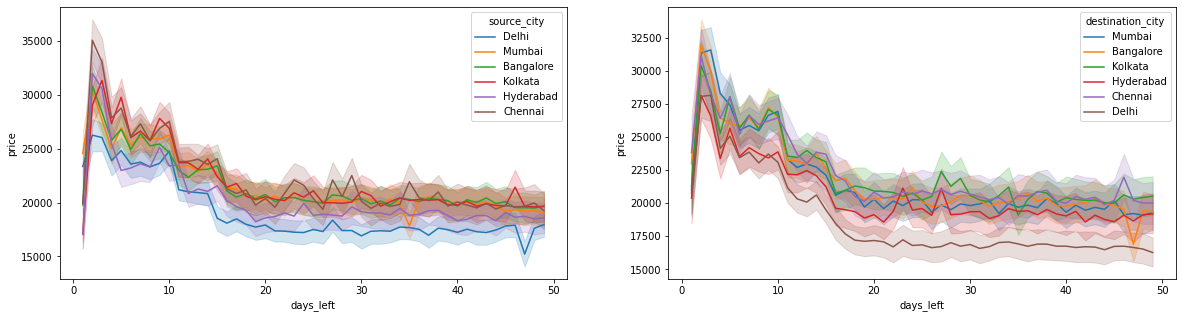

In [26]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.lineplot(x='days_left',y='price',data=df,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df,hue='destination_city',ax=ax[1])
plt.show()

<AxesSubplot:xlabel='source_city', ylabel='price'>

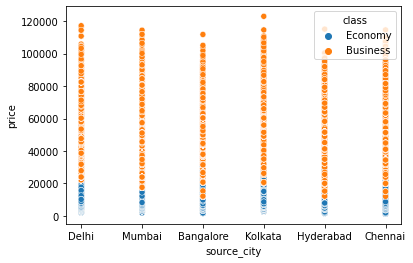

In [27]:
sns.scatterplot(x=df['source_city'],y=df['price'],hue=df['class'])

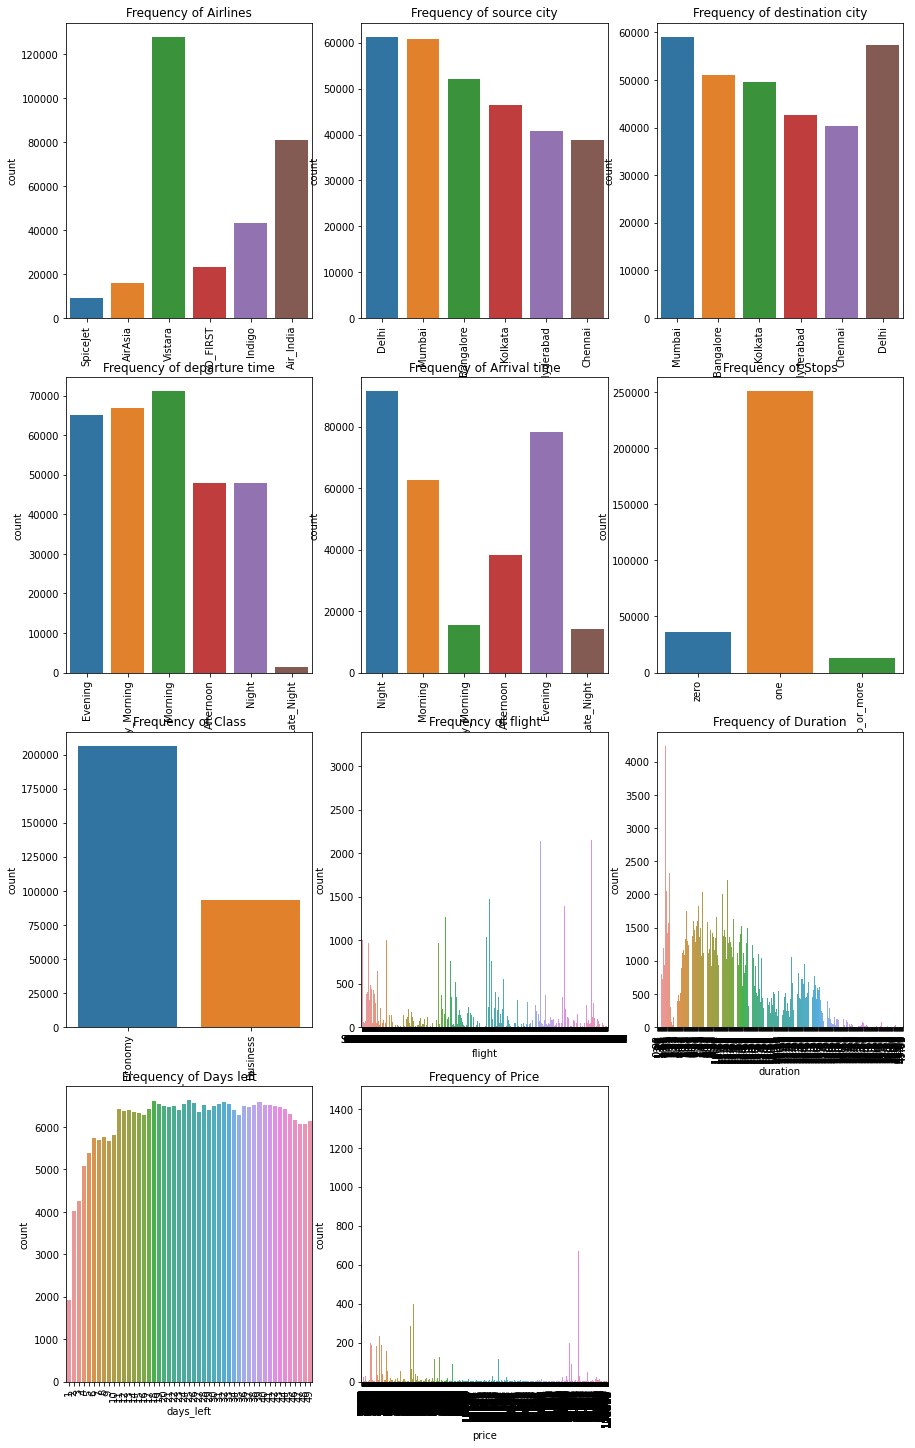

In [28]:
plt.figure(figsize=(15,25))

plt.subplot(4,3,1)
sns.countplot(x=df['airline'],data=df)
plt.title('Frequency of Airlines')
plt.xticks(rotation=90)

plt.subplot(4,3,2)
sns.countplot(x=df['source_city'],data=df)
plt.title('Frequency of source city')
plt.xticks(rotation=90)

plt.subplot(4,3,3)
sns.countplot(x=df['destination_city'],data=df)
plt.title('Frequency of destination city')
plt.xticks(rotation=90)

plt.subplot(4,3,4)
sns.countplot(x=df['departure_time'],data=df)
plt.title('Frequency of departure time')
plt.xticks(rotation=90)

plt.subplot(4,3,5)
sns.countplot(x=df['arrival_time'],data=df)
plt.title('Frequency of Arrival time')
plt.xticks(rotation=90)

plt.subplot(4,3,6)
sns.countplot(x=df['stops'],data=df)
plt.title('Frequency of Stops')
plt.xticks(rotation=90)

plt.subplot(4,3,7)
sns.countplot(x=df['class'],data=df)
plt.title('Frequency of Class')
plt.xticks(rotation=90)

plt.subplot(4,3,8)
sns.countplot(x=df['flight'],data=df)
plt.title('Frequency of flight')

plt.subplot(4,3,9)
sns.countplot(x=df['duration'],data=df)
plt.title('Frequency of Duration')
plt.xticks(rotation=90)

plt.subplot(4,3,10)
sns.countplot(x=df['days_left'],data=df)
plt.title('Frequency of Days left')
plt.xticks(rotation=90)

plt.subplot(4,3,11)
sns.countplot(x=df['price'],data=df)
plt.title('Frequency of Price')
plt.xticks(rotation=90)

plt.show()

In [29]:
df.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


<AxesSubplot:>

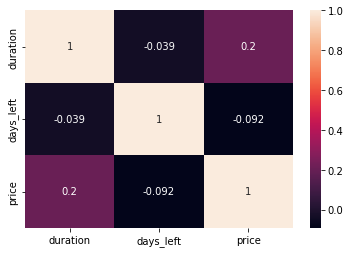

In [30]:
sns.heatmap(df.corr(),annot=True)

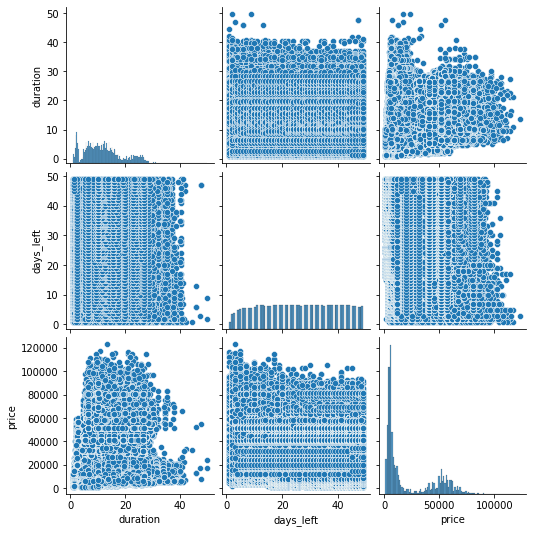

In [31]:
sns.pairplot(data=df)

In [32]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

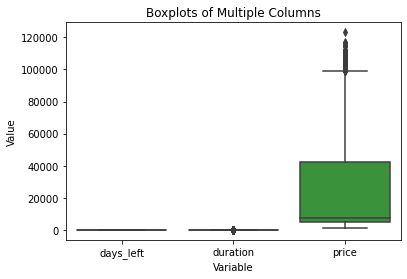

In [33]:
# Specify the columns you want to plot
columns_to_plot = ['airline', 'flight', 'arrival_time','departure_time','stops','days_left','class','duration','price',
                  'source_city','destination_city']


# Create a boxplot for each column using Seaborn
sns.boxplot(data=df[columns_to_plot])

# Add a title and labels to the plot
plt.title('Boxplots of Multiple Columns')
plt.xlabel('Variable')
plt.ylabel('Value')

# Show the plot
plt.show()

# LABEL ENCODING:

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['airline'] =le.fit_transform(df['airline']) 
df['source_city'] =le.fit_transform(df['source_city'])
df['departure_time'] =le.fit_transform(df['departure_time'])
df['stops'] =le.fit_transform(df['stops'])
df['arrival_time'] =le.fit_transform(df['arrival_time'])
df['destination_city'] =le.fit_transform(df['destination_city'])
df['class'] =le.fit_transform(df['class'])
df['flight'] =le.fit_transform(df['flight'])

#le.apply(data=df) -- for the whole dataset
#le=labelencoder()
#for i in df.coumns:
 #   if (df[i].dtype=='object'):
  #     df[i]=le.fit_transform(df[i])

In [35]:
#According to our preference, we can apply label or onehot encoding

In [36]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [37]:
df.dtypes

airline               int64
flight                int64
source_city           int64
departure_time        int64
stops                 int64
arrival_time          int64
destination_city      int64
class                 int64
duration            float64
days_left             int64
price                 int64
dtype: object

# Boxplots for various columns:

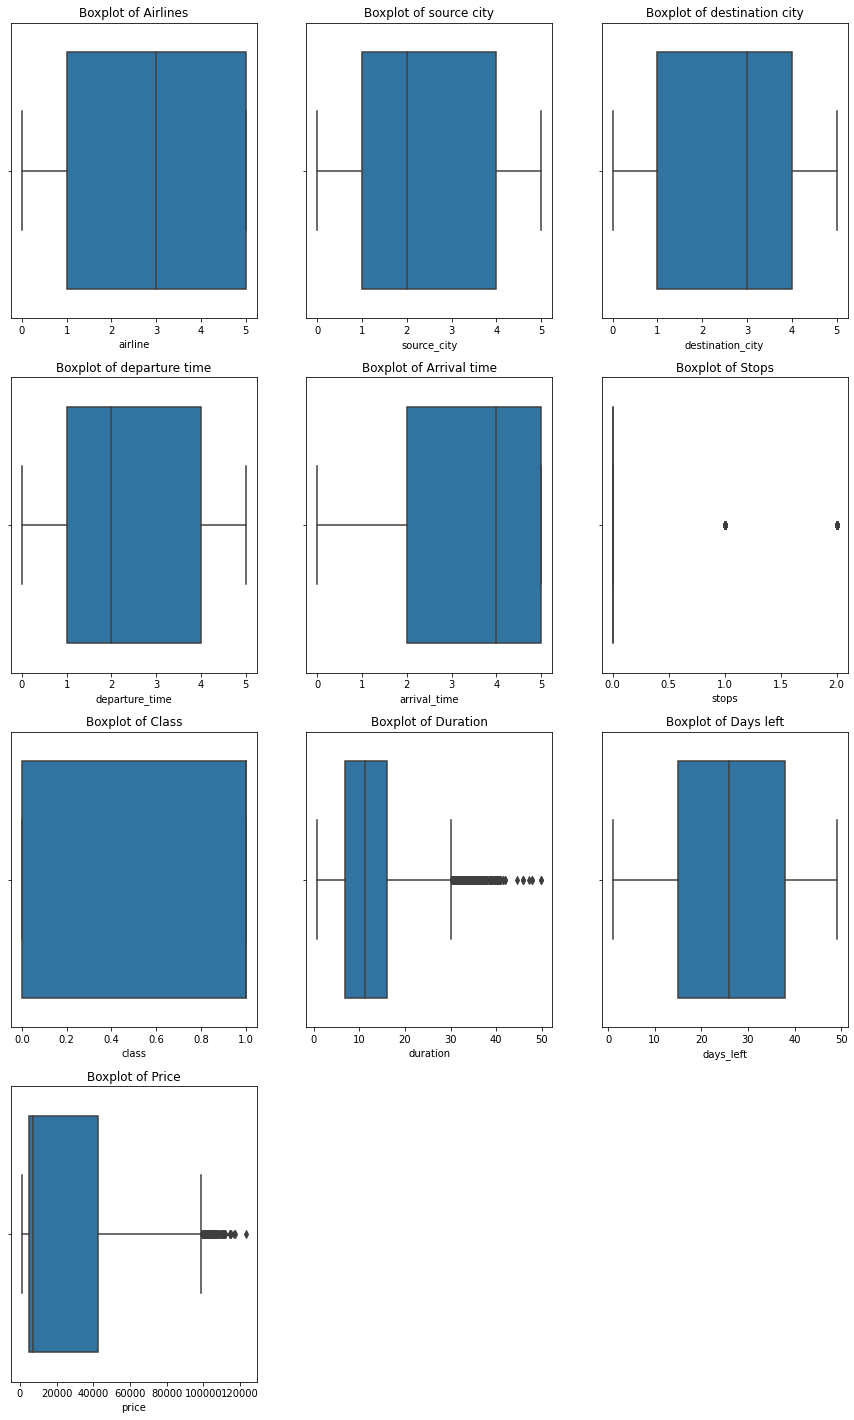

In [38]:
plt.figure(figsize=(15,25))

plt.subplot(4,3,1)
sns.boxplot(x=df['airline'],data=df)
plt.title('Boxplot of Airlines')

plt.subplot(4,3,2)
sns.boxplot(x=df['source_city'],data=df)
plt.title('Boxplot of source city')

plt.subplot(4,3,3)
sns.boxplot(x=df['destination_city'],data=df)
plt.title('Boxplot of destination city')

plt.subplot(4,3,4)
sns.boxplot(x=df['departure_time'],data=df)
plt.title('Boxplot of departure time')

plt.subplot(4,3,5)
sns.boxplot(x=df['arrival_time'],data=df)
plt.title('Boxplot of Arrival time')

plt.subplot(4,3,6)
sns.boxplot(x=df['stops'],data=df)
plt.title('Boxplot of Stops')

plt.subplot(4,3,7)
sns.boxplot(x=df['class'],data=df)
plt.title('Boxplot of Class')

plt.subplot(4,3,8)
sns.boxplot(x=df['duration'],data=df)
plt.title('Boxplot of Duration')

plt.subplot(4,3,9)
sns.boxplot(x=df['days_left'],data=df)
plt.title('Boxplot of Days left')

plt.subplot(4,3,10)
sns.boxplot(x=df['price'],data=df)
plt.title('Boxplot of Price')

plt.show()

# FEATURE SELECTION:

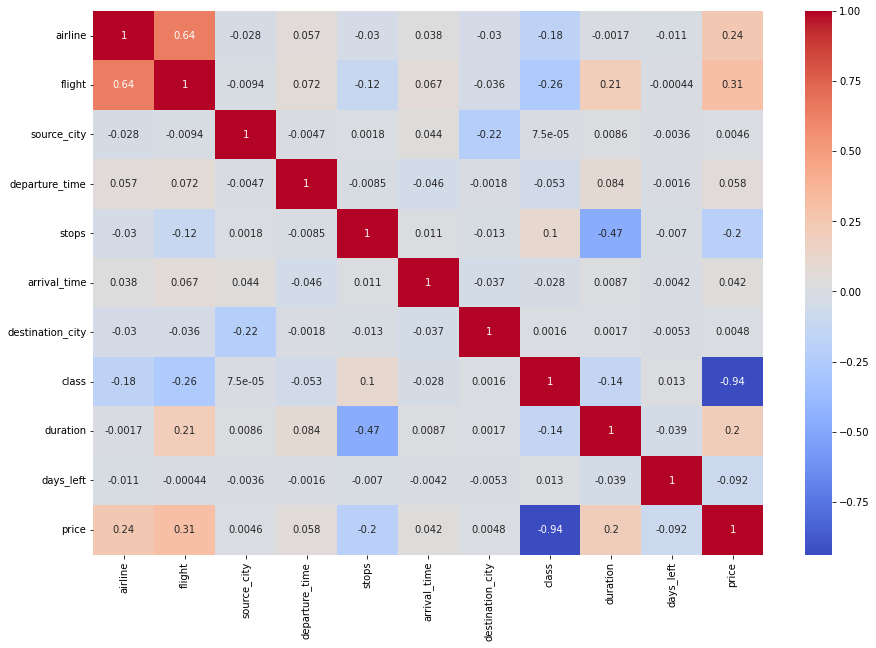

In [39]:
#heatmap:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

These are the following observations from the correlation graph:
1. positive correlation between airline and flight:0.64 
2. positive correlation between stops and duration:0.47
3. strong negative correlation between class and price:-0.94
 
which means there is multicollinearity  

# Selecting the features using VIF. VIF should be less than 5. 

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype !='object') & (col != 'price') ):
        col_list.append(col)
        
x = df[col_list] 
vif_data = pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

            feature        VIF
0           airline   6.701818
1            flight  12.675046
2       source_city   2.969540
3    departure_time   2.806009
4             stops   1.437326
5      arrival_time   3.784873
6  destination_city   2.918792
7             class   2.852072
8          duration   4.754588
9         days_left   4.071591


From above we can notice that all the features are having vif < 5 except flight so we drop flight

Dropping the flight column. All features are having VIF less than 5. 

In [41]:
df=df.drop(columns=['flight'],axis=1)

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype !='object') & (col != 'price') ):
        col_list.append(col)
        
x = df[col_list] 
vif_data = pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)
#vif threshold can be 5,6or7. It depends on our dataset

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


From above we can say that only 9 features out of 10 are enough but stops column also has correlation as we can notice from the heatmap so moving further we will remove that too. Thus, we select 8 features.

From above we can say that 8 features are enough we can remove stops too as it shows correlation 

In [43]:
df=df.drop(columns=['stops'],axis=1)

# Standardizing the dataset:

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # to standardise the dataset since min max values etc have a huge difference in their values

# 1. Linear Regression Model to predict the price of the flights:

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [46]:
x=df.iloc[:,:-1]
y=df['price']

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [48]:
x_train=scaler.fit_transform(x_train) #standardization
x_test=scaler.fit_transform(x_test)

In [49]:
x_train.shape

(240122, 8)

In [50]:
x_test.shape

(60031, 8)

In [51]:
lr=LinearRegression()

In [52]:
lr.fit(x_train,y_train)

LinearRegression()

In [53]:
y_pred=lr.predict(x_test)

In [54]:
y_pred

array([ 2763.18826348,  9881.53420469,  7416.97950377, ...,
       55797.60327979, 53463.42630377,  6001.46633727])

In [55]:
difference=pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual_value','Predicted_value'])
difference

,Actual_value,Predicted_value
0,3961.0,2763.188263
1,5102.0,9881.534205
2,12308.0,7416.979504
3,4099.0,4816.443772
4,4637.0,7367.944782
...,...,...
60026,3010.0,3090.690448
60027,41101.0,49180.797322
60028,41314.0,55797.603280
60029,57565.0,53463.426304


# Calculating r2 score,MSE, RMSE.


In [56]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error

In [57]:
print('r2_score is : ',r2_score(y_test,y_pred))
print('Mean squared error is : ', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score is :  0.8979837923176236
Mean squared error is :  52678707.528693855
Root mean squared error is : 7258.009887613398


# Plotting the graph of actual and predicted price of flight for Linear model

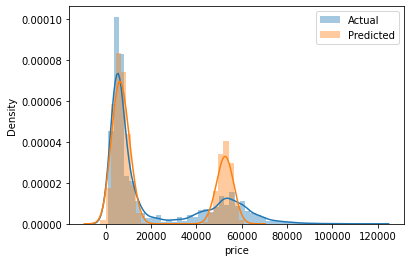

In [58]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
plt.show()

# 2. DECISION TREE REGRESSOR:

In [59]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
dt=DecisionTreeRegressor()

In [61]:
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [62]:
print('r2_score is : ',r2_score(y_test,y_pred))
print('Mean squared error is : ', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score is :  0.9657157464262551
Mean squared error is :  17703561.109367568
Root mean squared error is : 4207.559994743696


In [63]:
#PLotting the graph of actual and predicted price of flight for Decisiontree model

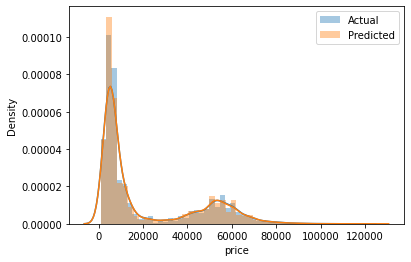

In [64]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
plt.show()

# 3. RANDOM FOREST REGRESSOR:

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rfc = RandomForestRegressor()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [67]:
print('r2_score is : ',r2_score(y_test,y_pred))
print('Mean squared error is : ', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score is :  0.979610800656878
Mean squared error is :  10528490.45599361
Root mean squared error is : 3244.763543926369


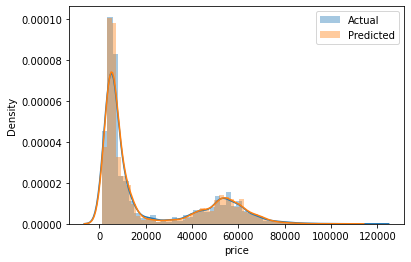

In [68]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
plt.show()

# 4. BAGGED DECISION TREE:

In [69]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [70]:
from sklearn.ensemble import BaggingRegressor
bc=BaggingRegressor(base_estimator=tree, n_estimators=100, random_state=42)
bc.fit(x_train,y_train)
y_pred=bc.predict(x_test)

In [71]:
print('r2_score is : ',r2_score(y_test,y_pred))
print('Mean squared error is : ', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score is :  0.9796988712240972
Mean squared error is :  10483012.940627882
Root mean squared error is : 3237.74812804021


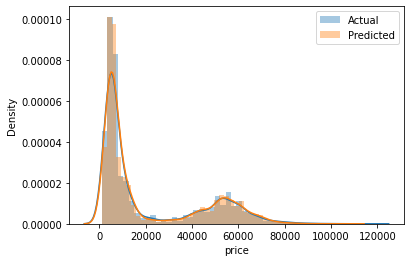

In [72]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
plt.show()

# 5. EXTRA TREES REGRESSOR:

In [73]:
from sklearn.ensemble import ExtraTreesRegressor
et=ExtraTreesRegressor(n_estimators=100,random_state=42)
et.fit(x_train,y_train)
y_pred=et.predict(x_test)

In [74]:
print('r2_score is : ',r2_score(y_test,y_pred))
print('Mean squared error is : ', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score is :  0.9817954692152328
Mean squared error is :  9400380.338520706
Root mean squared error is : 3066.0039690973504


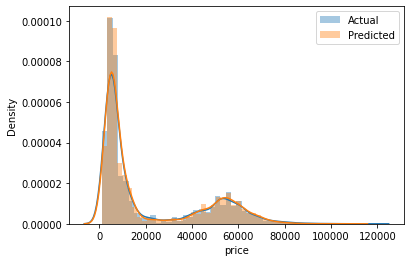

In [75]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
plt.show()

# 6. CATBOOST (CATAGORICAL BOOSTING) REGRESSOR:

In [76]:
from catboost import CatBoostRegressor
cbc= CatBoostRegressor()
cbc.fit(x_train,y_train)
y_pred=cbc.predict(x_test)

Learning rate set to 0.097339
0:	learn: 20637.3936915	total: 111ms	remaining: 1m 51s
1:	learn: 18795.3893555	total: 146ms	remaining: 1m 12s
2:	learn: 17143.7040302	total: 172ms	remaining: 57.3s
3:	learn: 15665.3943767	total: 198ms	remaining: 49.3s
4:	learn: 14349.0184922	total: 223ms	remaining: 44.5s
5:	learn: 13162.5112940	total: 251ms	remaining: 41.5s
6:	learn: 12125.8889255	total: 277ms	remaining: 39.3s
7:	learn: 11198.3278569	total: 302ms	remaining: 37.4s
8:	learn: 10383.3591592	total: 326ms	remaining: 35.9s
9:	learn: 9657.7168179	total: 354ms	remaining: 35.1s
10:	learn: 9025.5603836	total: 383ms	remaining: 34.4s
11:	learn: 8472.9102374	total: 416ms	remaining: 34.2s
12:	learn: 7986.9387258	total: 446ms	remaining: 33.9s
13:	learn: 7560.6643790	total: 474ms	remaining: 33.4s
14:	learn: 7198.9439601	total: 503ms	remaining: 33s
15:	learn: 6886.6881406	total: 533ms	remaining: 32.8s
16:	learn: 6620.8500955	total: 568ms	remaining: 32.9s
17:	learn: 6388.0407338	total: 598ms	remaining: 32.6s

152:	learn: 4471.9532161	total: 4.51s	remaining: 25s
153:	learn: 4469.4361718	total: 4.54s	remaining: 24.9s
154:	learn: 4468.3047149	total: 4.56s	remaining: 24.9s
155:	learn: 4467.3760341	total: 4.59s	remaining: 24.8s
156:	learn: 4464.7407756	total: 4.62s	remaining: 24.8s
157:	learn: 4463.6830743	total: 4.64s	remaining: 24.7s
158:	learn: 4460.3992251	total: 4.68s	remaining: 24.7s
159:	learn: 4456.1704190	total: 4.71s	remaining: 24.8s
160:	learn: 4455.6373843	total: 4.75s	remaining: 24.8s
161:	learn: 4451.4306972	total: 4.78s	remaining: 24.7s
162:	learn: 4447.6928450	total: 4.81s	remaining: 24.7s
163:	learn: 4444.4468647	total: 4.84s	remaining: 24.7s
164:	learn: 4442.2214286	total: 4.88s	remaining: 24.7s
165:	learn: 4440.7549526	total: 4.91s	remaining: 24.7s
166:	learn: 4435.1798542	total: 4.94s	remaining: 24.7s
167:	learn: 4432.3778266	total: 4.98s	remaining: 24.6s
168:	learn: 4431.3643033	total: 5s	remaining: 24.6s
169:	learn: 4429.1904417	total: 5.03s	remaining: 24.5s
170:	learn: 442

303:	learn: 4194.1687301	total: 8.73s	remaining: 20s
304:	learn: 4190.8281277	total: 8.77s	remaining: 20s
305:	learn: 4188.5563922	total: 8.8s	remaining: 20s
306:	learn: 4188.0331558	total: 8.83s	remaining: 19.9s
307:	learn: 4185.8860406	total: 8.86s	remaining: 19.9s
308:	learn: 4184.4664193	total: 8.89s	remaining: 19.9s
309:	learn: 4183.5727456	total: 8.92s	remaining: 19.9s
310:	learn: 4182.0342570	total: 8.96s	remaining: 19.8s
311:	learn: 4180.9570653	total: 8.99s	remaining: 19.8s
312:	learn: 4179.4698152	total: 9.02s	remaining: 19.8s
313:	learn: 4178.9893273	total: 9.05s	remaining: 19.8s
314:	learn: 4178.3083836	total: 9.08s	remaining: 19.7s
315:	learn: 4177.1422849	total: 9.11s	remaining: 19.7s
316:	learn: 4176.6073849	total: 9.14s	remaining: 19.7s
317:	learn: 4174.5976233	total: 9.17s	remaining: 19.7s
318:	learn: 4172.9373237	total: 9.21s	remaining: 19.7s
319:	learn: 4171.5034285	total: 9.23s	remaining: 19.6s
320:	learn: 4170.5989199	total: 9.26s	remaining: 19.6s
321:	learn: 4169.

456:	learn: 4016.2970221	total: 13.9s	remaining: 16.5s
457:	learn: 4014.8626323	total: 13.9s	remaining: 16.5s
458:	learn: 4013.6143530	total: 13.9s	remaining: 16.4s
459:	learn: 4011.8831545	total: 14s	remaining: 16.4s
460:	learn: 4010.5021209	total: 14s	remaining: 16.4s
461:	learn: 4009.8688690	total: 14s	remaining: 16.3s
462:	learn: 4009.5790722	total: 14.1s	remaining: 16.3s
463:	learn: 4008.8946048	total: 14.1s	remaining: 16.3s
464:	learn: 4008.0793107	total: 14.1s	remaining: 16.3s
465:	learn: 4006.6798121	total: 14.2s	remaining: 16.2s
466:	learn: 4005.7376585	total: 14.2s	remaining: 16.2s
467:	learn: 4005.1935294	total: 14.3s	remaining: 16.2s
468:	learn: 4004.5930387	total: 14.3s	remaining: 16.2s
469:	learn: 4003.5192398	total: 14.3s	remaining: 16.2s
470:	learn: 4002.4320813	total: 14.4s	remaining: 16.1s
471:	learn: 4002.1449528	total: 14.4s	remaining: 16.1s
472:	learn: 4000.7176245	total: 14.4s	remaining: 16.1s
473:	learn: 4000.0823400	total: 14.5s	remaining: 16s
474:	learn: 3998.7

611:	learn: 3868.8891696	total: 18.9s	remaining: 12s
612:	learn: 3868.5728710	total: 18.9s	remaining: 11.9s
613:	learn: 3868.0270667	total: 19s	remaining: 11.9s
614:	learn: 3867.4654685	total: 19s	remaining: 11.9s
615:	learn: 3866.5137096	total: 19s	remaining: 11.9s
616:	learn: 3866.0856084	total: 19s	remaining: 11.8s
617:	learn: 3865.1739317	total: 19.1s	remaining: 11.8s
618:	learn: 3864.3024027	total: 19.1s	remaining: 11.8s
619:	learn: 3863.9882788	total: 19.2s	remaining: 11.7s
620:	learn: 3863.2219635	total: 19.2s	remaining: 11.7s
621:	learn: 3862.7362111	total: 19.2s	remaining: 11.7s
622:	learn: 3862.0212468	total: 19.2s	remaining: 11.6s
623:	learn: 3861.7002834	total: 19.3s	remaining: 11.6s
624:	learn: 3860.8120282	total: 19.3s	remaining: 11.6s
625:	learn: 3860.2980633	total: 19.3s	remaining: 11.6s
626:	learn: 3859.9591604	total: 19.4s	remaining: 11.5s
627:	learn: 3859.3496124	total: 19.4s	remaining: 11.5s
628:	learn: 3858.9394205	total: 19.4s	remaining: 11.5s
629:	learn: 3858.093

763:	learn: 3757.9510524	total: 23.7s	remaining: 7.31s
764:	learn: 3756.9439385	total: 23.8s	remaining: 7.3s
765:	learn: 3756.2826163	total: 23.8s	remaining: 7.28s
766:	learn: 3754.4291552	total: 23.9s	remaining: 7.26s
767:	learn: 3754.1094410	total: 24s	remaining: 7.26s
768:	learn: 3753.7109916	total: 24.1s	remaining: 7.23s
769:	learn: 3753.4751630	total: 24.1s	remaining: 7.2s
770:	learn: 3752.6818295	total: 24.1s	remaining: 7.17s
771:	learn: 3751.1632272	total: 24.2s	remaining: 7.14s
772:	learn: 3750.7015372	total: 24.2s	remaining: 7.11s
773:	learn: 3749.8849772	total: 24.2s	remaining: 7.08s
774:	learn: 3749.1219291	total: 24.3s	remaining: 7.04s
775:	learn: 3748.2992945	total: 24.3s	remaining: 7.02s
776:	learn: 3747.8154081	total: 24.3s	remaining: 6.99s
777:	learn: 3747.5428550	total: 24.4s	remaining: 6.96s
778:	learn: 3747.1563296	total: 24.4s	remaining: 6.92s
779:	learn: 3745.9849509	total: 24.4s	remaining: 6.89s
780:	learn: 3745.5737950	total: 24.5s	remaining: 6.86s
781:	learn: 37

918:	learn: 3655.7325697	total: 28.2s	remaining: 2.49s
919:	learn: 3654.9858633	total: 28.3s	remaining: 2.46s
920:	learn: 3654.3448450	total: 28.3s	remaining: 2.43s
921:	learn: 3653.8000573	total: 28.3s	remaining: 2.4s
922:	learn: 3653.3265880	total: 28.4s	remaining: 2.37s
923:	learn: 3652.2435827	total: 28.4s	remaining: 2.33s
924:	learn: 3651.8296584	total: 28.4s	remaining: 2.3s
925:	learn: 3651.1077439	total: 28.4s	remaining: 2.27s
926:	learn: 3650.3962782	total: 28.5s	remaining: 2.24s
927:	learn: 3650.1613118	total: 28.5s	remaining: 2.21s
928:	learn: 3649.8703031	total: 28.5s	remaining: 2.18s
929:	learn: 3649.2771870	total: 28.6s	remaining: 2.15s
930:	learn: 3649.0191473	total: 28.6s	remaining: 2.12s
931:	learn: 3648.1570152	total: 28.6s	remaining: 2.09s
932:	learn: 3646.6998295	total: 28.6s	remaining: 2.06s
933:	learn: 3646.0079540	total: 28.7s	remaining: 2.03s
934:	learn: 3645.7522970	total: 28.7s	remaining: 2s
935:	learn: 3645.5505047	total: 28.7s	remaining: 1.96s
936:	learn: 364

In [77]:
print('r2_score is : ',r2_score(y_test,y_pred))
print('Mean squared error is : ', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score is :  0.9697821310853199
Mean squared error is :  15603778.211918788
Root mean squared error is : 3950.1617956634113


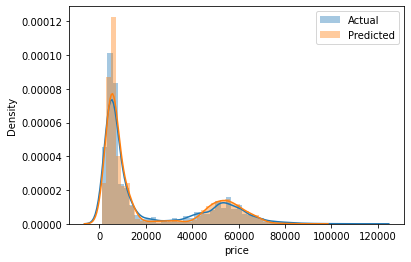

In [78]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
plt.show()

# 7. GRADIENT BOOSTING REGRESSOR:

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
gbc=GradientBoostingRegressor(n_estimators=100, random_state=42)
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)

In [80]:
print('r2_score is : ',r2_score(y_test,y_pred))
print('Mean squared error is : ', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score is :  0.9516913103481995
Mean squared error is :  24945441.426179018
Root mean squared error is : 4994.541162727465


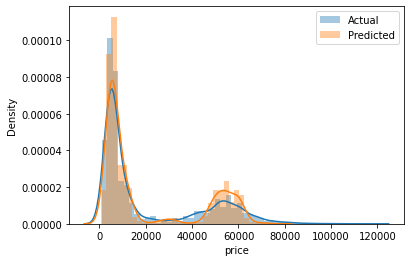

In [81]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
plt.show()

# 8. XGBOOST(XTREME GRADIENT BOOSTING) REGRESSOR:

In [82]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

In [83]:
print('r2_score is : ',r2_score(y_test,y_pred))
print('Mean squared error is : ', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score is :  0.9689659580019152
Mean squared error is :  16025230.294193089
Root mean squared error is : 4003.152544457067


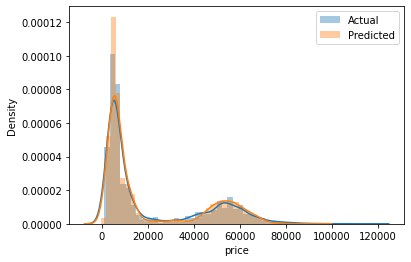

In [84]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
plt.show()

# 9. ADABOOST(ADAPTIVE BOOSTING) REGRESSOR:

In [85]:
from sklearn.ensemble import AdaBoostRegressor
abc=AdaBoostRegressor(n_estimators=100)
abc.fit(x_train,y_train)
y_pred=abc.predict(x_test)

In [86]:
print('r2_score is : ',r2_score(y_test,y_pred))
print('Mean squared error is : ', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score is :  0.934938622480058
Mean squared error is :  33596125.1221755
Root mean squared error is : 5796.2164488721


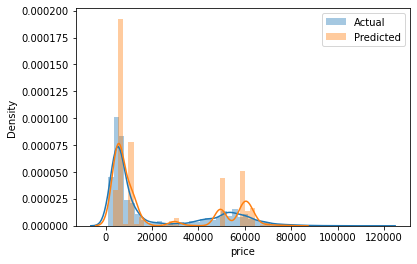

In [87]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
plt.show()